In [1]:
!pip install sqlalchemy
!pip install pymssql


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sqlalchemy import create_engine
import pymssql
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor


In [4]:


server = "mssql-82792-0.cloudclusters.net:16272"
username = "user"
password = "RiceOwls1912" # paste password between quote marks
database = "ghz"

string = "mssql+pymssql://" + username + ":" + password + "@" + server + "/" + database

conn = create_engine(string).connect()

In [5]:

data = pd.read_sql(
    """
    select ticker, date, ret, roeq, mom12m
    from data
    where date='2021-12'
    """, 
    conn
)
data = data.dropna()

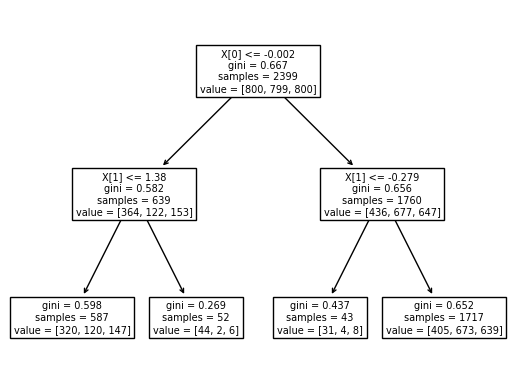

In [6]:

data['class'] = data.ret.transform(
  lambda x: pd.qcut(x, 3, labels=(0, 1, 2))
)
X = data[["roeq", "mom12m"]]
y = data["class"]

model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

plot_tree(model)
plt.show()

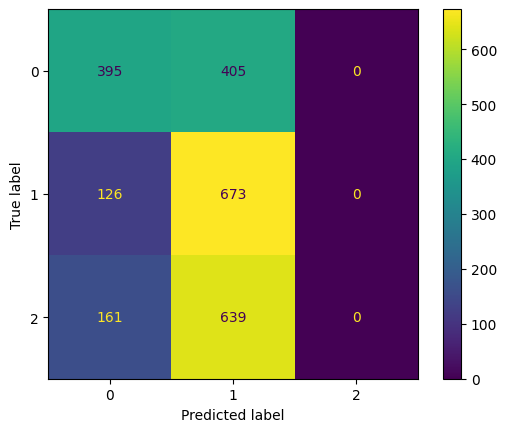

In [7]:
ConfusionMatrixDisplay.from_estimator(model, X=X, y=y)
plt.show()

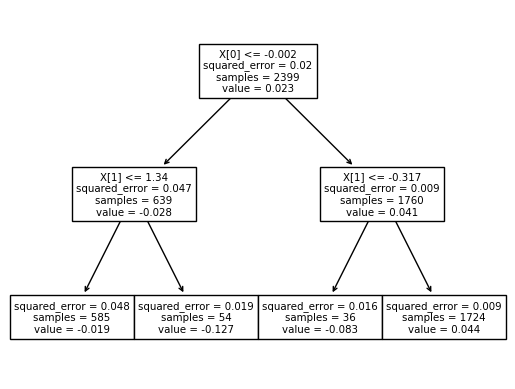

In [8]:
X = data[["roeq", "mom12m"]]
y = data["ret"]

model = DecisionTreeRegressor(max_depth=2, random_state=0)
model.fit(X, y)

plot_tree(model)
plt.show()

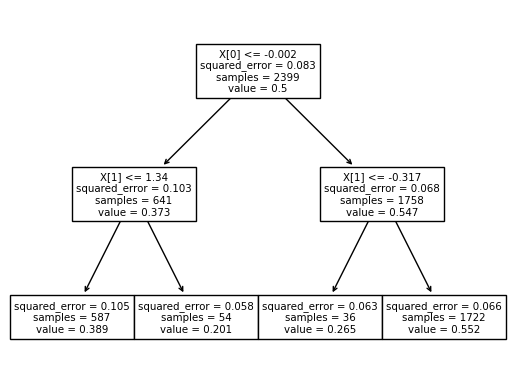

In [9]:
data['rnk'] = data.ret.rank(pct=True)

X = data[["roeq", "mom12m"]]
y = data["rnk"]

model = DecisionTreeRegressor(max_depth=2, random_state=0)
model.fit(X, y)

plot_tree(model)
plt.show()

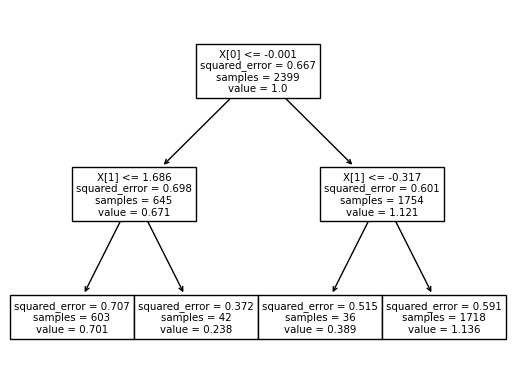

In [10]:
X = data[["roeq", "mom12m"]]
y = data["class"]

model = DecisionTreeRegressor(
  max_depth=2,
  random_state=0
)
model.fit(X, y)

plot_tree(model)
plt.show()